
# Assumptions of the project

Program realizuje zadanie polegające na skategoryzowaniu odpowiedniego rodzaju alkoholu, po przedstawieniu butelki przez użytkownika. 

W celu realizacji tego zadania została przygotowana autorska baza danych składająca się z odpowiednio pokategoryzowanych zdjęć oraz sieć neuronowa. 

Dane zostały oczyszczone w odpowiedni sposób oraz rozbudowane przez technikę albumentacji.

Technologie użyte podczas projektu:
bs4, tensorflow, albomentations, cv2, numpy, seaborn

# IMPORTS

In [ ]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import os
import random

from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


import albumentations as A

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [ ]:
# link to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA COLLECTION 

## Single sample

In [ ]:
category = 'pol_m_Inne-alkohole'
subcategory = '_Gin'
page_counter = '2'
identi = '-465'

url = f"https://sklep-domwhisky.pl/{category}{subcategory}{identi}.html?counter={page_counter}"

In [ ]:
response = requests.get(url)
content = response.content

In [ ]:
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
imgs = soup.find_all('img',{'class': 'b-lazy'})

In [ ]:
len(imgs)

32

In [ ]:
imgs[0]['data-src']

'/pol_il_Bombay-Sapphire-Sunset-Special-Edition-London-Dry-Gin-43-0-7l-28158.jpg'

In [ ]:
for img in imgs:
  urls = 'https://sklep-domwhisky.pl' + img['data-src']
  print(urls)

https://sklep-domwhisky.pl/pol_il_Bombay-Sapphire-Sunset-Special-Edition-London-Dry-Gin-43-0-7l-28158.jpg
https://sklep-domwhisky.pl/pol_il_Gin-Lane-1751-Old-Tom-Gin-UK-40-0-7l-15090.jpg
https://sklep-domwhisky.pl/pol_il_Cross-Keys-Single-Batch-Gin-41-0-7l-17938.jpg
https://sklep-domwhisky.pl/pol_il_Goa-Loove-Edition-Wild-Berry-Premium-Gin-37-5-0-7l-18500.jpg
https://sklep-domwhisky.pl/pol_il_Tenjaku-Gin-37-5-0-7l-26403.jpg
https://sklep-domwhisky.pl/pol_il_Cross-Keys-Black-Currant-Small-Batch-Gin-38-0-7l-30888.jpg
https://sklep-domwhisky.pl/pol_il_Cross-Keys-Sea-Buckthorn-Premium-Craft-Gin-38-0-7l-30889.jpg
https://sklep-domwhisky.pl/pol_il_Cross-Keys-Botanical-Small-Batch-Gin-41-0-7l-30890.jpg
https://sklep-domwhisky.pl/pol_il_Poppies-Gin-14-18-Belgia-40-0-5l-14144.jpg
https://sklep-domwhisky.pl/pol_il_Peaky-Blinder-Spiced-Dry-Gin-40-0-7l-18527.jpg
https://sklep-domwhisky.pl/pol_il_Xoriguer-Mahon-Gin-38-0-7l-25225.jpg
https://sklep-domwhisky.pl/pol_il_Beefeater-Blood-Orange-London-Gi

In [ ]:
end_urls = [img['data-src'] for img in imgs]

In [ ]:
end_urls[0]

'/pol_il_Bombay-Sapphire-Sunset-Special-Edition-London-Dry-Gin-43-0-7l-28158.jpg'

In [ ]:
response = requests.get(urls)
content = response.content

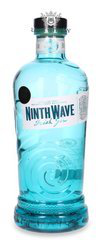

In [ ]:
Image.open(BytesIO(content))

In [ ]:
img = Image.open(BytesIO(content))

In [ ]:
img.save('gin.jpg')


In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img.size

(102, 250)

## Mass collection

### Downloading functions

In [ ]:
def get_page(category, subcategory, identi, page_counter):
  url = f"https://sklep-domwhisky.pl/{category}{subcategory}{identi}.html?counter={page_counter}"
  try:
    response = requests.get(url)
    content = response.content
    return content
  except:
    print('Web doesnt exist')

In [ ]:
def parse_url(content):
  soup = BeautifulSoup(content, 'html.parser')
  imgs = soup.find_all('img',{'class': 'b-lazy'})
  end_link = [img['data-src'] for img in imgs]
  return end_link

  

In [ ]:
def get_img(url, path, subcategory):
  try: 
    response = requests.get(url)
    content = response.content
    img = Image.open(BytesIO(content))
    img_name = url.split('/')[-1].split('.')[0] + '.jpg'
    os.makedirs(f'{path}/{subcategory}', exist_ok=True)
    img.save(f'{path}/{subcategory}/{img_name}')
  except:
    print('Fail')

In [ ]:
def get_data(category,
             subcategory,
             identi,
             start_page,
             end_page,
             path):
  for page_counter in range(start_page, end_page + 1):
    content = get_page(category, subcategory, identi, page_counter)
    urls =  parse_url(content)

    for i, url in enumerate(urls):
      link = 'https://sklep-domwhisky.pl' + url
      get_img(link, path, subcategory)
      if i % 20 == 0:
        print(f'Downloaded {i} for page {page_counter} from {subcategory}')

### Pobieranie danych

In [ ]:
data_path = 'drive/MyDrive/vision_alko_project/data/train'

get_data('pol_m_Inne-alkohole_', 'Gin', '-465', 1, 10, data_path)
get_data('pol_m_Inne-alkohole_', 'Mezcal-Sotol-Tequila', '-473', 1, 10, data_path)
get_data('pol_m_Inne-alkohole_', 'Wodki-Okowity-Nalewki', '-207', 1, 10, data_path)
get_data('pol_m_Inne-alkohole_', 'Rum', '-467', 1, 10, data_path)
get_data('pol_m_Inne-alkohole_', 'Likiery', '-193', 1, 10, data_path)
get_data('pol_m_World-Whisky_', 'Whiskey-amerykanska', '-151', 1, 10, data_path)

Downloaded 0 for page 1 from Gin
Downloaded 20 for page 1 from Gin
Downloaded 0 for page 2 from Gin
Downloaded 20 for page 2 from Gin
Downloaded 0 for page 3 from Gin
Downloaded 20 for page 3 from Gin
Downloaded 0 for page 4 from Gin
Downloaded 20 for page 4 from Gin
Downloaded 0 for page 5 from Gin
Downloaded 20 for page 5 from Gin
Downloaded 0 for page 6 from Gin
Downloaded 20 for page 6 from Gin
Downloaded 0 for page 7 from Gin
Downloaded 20 for page 7 from Gin
Downloaded 0 for page 8 from Gin
Downloaded 20 for page 8 from Gin
Downloaded 0 for page 9 from Gin
Downloaded 20 for page 9 from Gin
Downloaded 0 for page 10 from Gin
Downloaded 20 for page 10 from Gin
Downloaded 0 for page 1 from Mezcal-Sotol-Tequila
Downloaded 20 for page 1 from Mezcal-Sotol-Tequila
Downloaded 0 for page 2 from Mezcal-Sotol-Tequila
Downloaded 20 for page 2 from Mezcal-Sotol-Tequila
Downloaded 0 for page 3 from Mezcal-Sotol-Tequila
Downloaded 20 for page 3 from Mezcal-Sotol-Tequila
Downloaded 0 for page 4 f

## Train Split

In [ ]:
['Gin', 'Mezcal-Sotol-Tequila', 'Wodki-Okowity-Nalewki', 'Rum', 'Likiery', 'Whiskey-amerykanska']

['Gin',
 'Mezcal-Sotol-Tequila',
 'Wodki-Okowity-Nalewki',
 'Rum',
 'Likiery',
 'Whiskey-amerykanska']

In [ ]:
#data_path = 'drive/MyDrive/vision_alko_project/data'
#os.makedirs(data_path + '/test', exist_ok=True)
#test_size = 0.2

#for subcategory in ['Gin', 'Mezcal-Sotol-Tequila', 'Wodki-Okowity-Nalewki', 'Rum', 'Likiery', 'Whiskey-amerykanska']:
 # os.makedirs(data_path + '/test/' + subcategory, exist_ok=True)
  #file_list = os.listdir(data_path + '/train/' + subcategory)
  #number_of_samples = int(len(file_list) * test_size)
  #for file_name in random.sample(file_list, number_of_samples):
   # os.rename(data_path + '/train/' + subcategory + '/' + file_name,
    #          data_path + '/test/' + subcategory + '/' + file_name)

In [ ]:
len(os.listdir(data_path + '/train/Gin'))

256

In [ ]:
len(os.listdir(data_path + '/test/Gin'))

64

# MODEL

## Train and Val

In [ ]:
data_path = 'drive/MyDrive/vision_project/data'

batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    data_path + '/train',
    labels='inferred',
    validation_split = 0.2,
    seed = 110,
    subset='training',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

val_ds = keras.utils.image_dataset_from_directory(
    data_path + '/train',
    labels='inferred',
    validation_split = 0.2,
    seed = 110,
    subset='validation',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

test_ds = keras.utils.image_dataset_from_directory(
    data_path + '/test',
    labels='inferred',
    validation_split = 0.5,
    seed = 110,
    subset='both',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

Found 2561 files belonging to 6 classes.
Using 2049 files for training.
Found 2561 files belonging to 6 classes.
Using 512 files for validation.
Found 575 files belonging to 6 classes.
Using 288 files for training.
Using 287 files for validation.


### Data integrity check

In [ ]:
from pathlib import Path
import imghdr

data_dir = "drive/MyDrive/vision_project/data"
image_extensions = [".png", ".jpg"]  

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

KeyboardInterrupt: ignored

In [ ]:
train_ds.class_names

In [ ]:
for image, label in train_ds:
  print(image.shape)
  print(label.shape)

## Simple Model

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(16,
                        (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))


model.add(layers.Dense(6, activation='softmax'))

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
learning_rate=0.01

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[es]
)

Epoch 1/100
65/65 [==============================] - 4s 59ms/step - loss: 0.4372 - accuracy: 0.8429 - val_loss: 2.2737 - val_accuracy: 0.5254
Epoch 2/100
65/65 [==============================] - 5s 76ms/step - loss: 0.2986 - accuracy: 0.8936 - val_loss: 2.8369 - val_accuracy: 0.5039
Epoch 3/100
65/65 [==============================] - 4s 58ms/step - loss: 0.2291 - accuracy: 0.9351 - val_loss: 2.8992 - val_accuracy: 0.5059
Epoch 4/100
65/65 [==============================] - 4s 59ms/step - loss: 0.4357 - accuracy: 0.8438 - val_loss: 3.7567 - val_accuracy: 0.4980
Epoch 5/100
65/65 [==============================] - 5s 76ms/step - loss: 0.2013 - accuracy: 0.9341 - val_loss: 3.7531 - val_accuracy: 0.4844
Epoch 6/100
65/65 [==============================] - 4s 58ms/step - loss: 0.1296 - accuracy: 0.9639 - val_loss: 4.3010 - val_accuracy: 0.4941


## Model with BN and Dropout

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())


model.add(layers.Conv2D(64,
                        (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.2))



model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.3))


model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(6, activation='softmax'))

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
learning_rate=0.001

model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[es]
)

Epoch 1/100
65/65 [==============================] - 16s 112ms/step - loss: 2.4302 - accuracy: 0.2411 - val_loss: 3.2760 - val_accuracy: 0.1035
Epoch 2/100
65/65 [==============================] - 7s 102ms/step - loss: 1.9891 - accuracy: 0.3241 - val_loss: 2.9798 - val_accuracy: 0.1035
Epoch 3/100
65/65 [==============================] - 6s 93ms/step - loss: 1.7937 - accuracy: 0.3553 - val_loss: 2.5390 - val_accuracy: 0.1387
Epoch 4/100
65/65 [==============================] - 7s 104ms/step - loss: 1.7354 - accuracy: 0.3660 - val_loss: 3.8048 - val_accuracy: 0.0684
Epoch 5/100
65/65 [==============================] - 6s 93ms/step - loss: 1.6958 - accuracy: 0.3812 - val_loss: 3.0735 - val_accuracy: 0.0684
Epoch 6/100
65/65 [==============================] - 7s 99ms/step - loss: 1.6002 - accuracy: 0.3929 - val_loss: 5.9305 - val_accuracy: 0.0684
Epoch 7/100
65/65 [==============================] - 6s 93ms/step - loss: 1.5658 - accuracy: 0.3973 - val_loss: 2.3161 - val_accuracy: 0.1934
Ep

## Model with more layers

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())


model.add(layers.Conv2D(32,
                        (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.3))


model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))


model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Dense(6, activation='softmax'))

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
learning_rate=0.003

model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[es]
)

Epoch 1/100
65/65 [==============================] - 13s 75ms/step - loss: 1.9362 - accuracy: 0.3109 - val_loss: 10.4511 - val_accuracy: 0.3652
Epoch 2/100
65/65 [==============================] - 5s 78ms/step - loss: 1.5799 - accuracy: 0.3982 - val_loss: 4.2981 - val_accuracy: 0.1387
Epoch 3/100
65/65 [==============================] - 5s 68ms/step - loss: 1.5102 - accuracy: 0.4178 - val_loss: 4.2448 - val_accuracy: 0.1035
Epoch 4/100
65/65 [==============================] - 6s 83ms/step - loss: 1.4331 - accuracy: 0.4285 - val_loss: 3.3879 - val_accuracy: 0.1367
Epoch 5/100
65/65 [==============================] - 5s 69ms/step - loss: 1.3808 - accuracy: 0.4427 - val_loss: 2.8504 - val_accuracy: 0.1387
Epoch 6/100
65/65 [==============================] - 5s 77ms/step - loss: 1.3526 - accuracy: 0.4666 - val_loss: 2.2375 - val_accuracy: 0.1445
Epoch 7/100
65/65 [==============================] - 5s 79ms/step - loss: 1.3598 - accuracy: 0.4534 - val_loss: 1.9467 - val_accuracy: 0.2969
Epoc

## Best working model

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())


model.add(layers.Conv2D(32,
                        (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.3))


model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Dense(6, activation='softmax'))

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)
learning_rate=0.003

model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[es]
)

Epoch 1/100
65/65 [==============================] - 15s 77ms/step - loss: 2.0437 - accuracy: 0.2787 - val_loss: 5.3991 - val_accuracy: 0.1113
Epoch 2/100
65/65 [==============================] - 6s 83ms/step - loss: 1.7142 - accuracy: 0.3455 - val_loss: 4.0043 - val_accuracy: 0.1426
Epoch 3/100
65/65 [==============================] - 5s 71ms/step - loss: 1.5646 - accuracy: 0.3929 - val_loss: 3.0798 - val_accuracy: 0.1387
Epoch 4/100
65/65 [==============================] - 5s 71ms/step - loss: 1.4827 - accuracy: 0.4041 - val_loss: 3.2784 - val_accuracy: 0.1387
Epoch 5/100
65/65 [==============================] - 7s 106ms/step - loss: 1.4491 - accuracy: 0.4183 - val_loss: 3.0273 - val_accuracy: 0.1328
Epoch 6/100
65/65 [==============================] - 5s 70ms/step - loss: 1.4260 - accuracy: 0.4348 - val_loss: 2.8847 - val_accuracy: 0.1270
Epoch 7/100
65/65 [==============================] - 5s 74ms/step - loss: 1.4173 - accuracy: 0.4475 - val_loss: 2.2590 - val_accuracy: 0.1758
Epoc

## Albumentation

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

# adding albumentation layers doesnt help improve score

#model.add(layers.RandomCrop(128,128))
#model.add(layers.RandomBrightness(0.7, value_range=(0, 255)))
#model.add(layers.RandomContrast(0.5))
model.add(layers.RandomZoom(
    height_factor=(-0.3, -0.2),
    width_factor=(-0.3, -0.2),
    fill_mode="reflect",
    interpolation="bilinear",
   seed=100))

model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())


model.add(layers.Conv2D(32,
                        (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.3))


model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Dense(6, activation='softmax'))

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
learning_rate=0.003

model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[es]
)

Epoch 1/100
65/65 [==============================] - 559s 8s/step - loss: 2.0578 - accuracy: 0.2782 - val_loss: 5.2374 - val_accuracy: 0.1191
Epoch 2/100
65/65 [==============================] - 241s 4s/step - loss: 1.6657 - accuracy: 0.3655 - val_loss: 5.1623 - val_accuracy: 0.1094
Epoch 3/100
65/65 [==============================] - 233s 4s/step - loss: 1.5441 - accuracy: 0.4061 - val_loss: 3.2845 - val_accuracy: 0.1289
Epoch 4/100
50/65 [======================>.......] - ETA: 52s - loss: 1.5034 - accuracy: 0.4238

KeyboardInterrupt: ignored

## Last test

In [ ]:
model = Sequential()
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(256,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())


model.add(layers.Conv2D(256,
                        (3,3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.1))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.3))


model.add(layers.Conv2D(64,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Conv2D(128,
                        (3,3),
                        input_shape = (img_width, img_height, 3),
                        padding = 'same',
                        activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Dense(6, activation='softmax'))

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)
learning_rate=0.003

model.compile(optimizer= keras.optimizers.Adam(learning_rate=learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    batch_size = batch_size,
    callbacks=[es]
)

Epoch 1/100
65/65 [==============================] - 5s 75ms/step - loss: 0.8898 - accuracy: 0.6798 - val_loss: 1.5760 - val_accuracy: 0.4707
Epoch 2/100
65/65 [==============================] - 6s 84ms/step - loss: 0.8684 - accuracy: 0.6681 - val_loss: 1.2826 - val_accuracy: 0.5430
Epoch 3/100
65/65 [==============================] - 5s 73ms/step - loss: 0.8235 - accuracy: 0.6999 - val_loss: 1.4718 - val_accuracy: 0.5098
Epoch 4/100
65/65 [==============================] - 6s 86ms/step - loss: 0.7802 - accuracy: 0.7106 - val_loss: 1.3608 - val_accuracy: 0.5371
Epoch 5/100
65/65 [==============================] - 5s 74ms/step - loss: 0.8465 - accuracy: 0.6862 - val_loss: 1.2571 - val_accuracy: 0.5684
Epoch 6/100
65/65 [==============================] - 6s 83ms/step - loss: 0.7467 - accuracy: 0.7291 - val_loss: 1.4088 - val_accuracy: 0.5664
Epoch 7/100
65/65 [==============================] - 5s 73ms/step - loss: 0.7406 - accuracy: 0.7291 - val_loss: 1.6454 - val_accuracy: 0.5352
Epoch 

# PREDICTIONS

In [ ]:
os.listdir(data_path + '/test/Gin')

['pol_il_Marcati-Extreme-Gin-42-0-7l-15942.jpg',
 'pol_il_Gordons-White-Peach-Gin-37-5-0-7l-21993.jpg',
 'pol_il_Langleys-London-Dry-Gin-41-7-0-7l-28736.jpg',
 'pol_il_Boodles-British-Gin-London-Dry-40-0-7l-10971.jpg',
 'pol_il_Whitley-Neill-Handcrafted-Quince-Dry-Gin-43-0-7l-13976.jpg',
 'pol_il_Mayfair-London-Dry-Gin-40-0-7l-15764.jpg',
 'pol_il_Whitley-Neill-Handcrafted-Raspberry-Gin-43-0-7l-19401.jpg',
 'pol_il_Whitley-Neill-Platinum-Original-Gin-43-0-7l-28387.jpg',
 'pol_il_Roku-Japanese-Craft-Gin-43-0-7l-14707.jpg',
 'pol_il_1528-Cocoa-Gin-40-0-7l-30744.jpg',
 'pol_il_Roku-Japanese-Craft-Gin-szklanka-43-0-7l-31219.jpg',
 'pol_il_Metropolitan-London-Dry-Gin-40-0-7l-26049.jpg',
 'pol_il_Haymans-Sloe-Gin-26-0-7l-10653.jpg',
 'pol_il_Haymans-London-Dry-Gin-41-2-0-7l-15823.jpg',
 'pol_il_Saffron-Gin-Gabriel-Boudier-Dijon-40-0-7l-10563.jpg',
 'pol_il_Warners-Spring-Blossom-Gin-40-0-7l-20001.jpg',
 'pol_il_Damrak-Amsterdam-Original-Gin-41-8-0-7l-10973.jpg',
 'pol_il_Ungava-Canadian-Prem

In [ ]:
filename = 'pol_il_Pickerings-Original-1947-Gin-Szkocja-42-0-7l-27857.jpg'

In [ ]:
img = cv2.imread(data_path + '/test/Gin/' + filename)

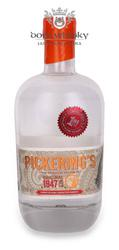

In [ ]:
cv2_imshow(img)

In [ ]:
resized = cv2.resize(img, (img_width, img_height))

In [ ]:
model.predict(np.array([resized]))

1/1 [==============================] - 0s 24ms/step


array([[0.80486166, 0.03132312, 0.00860951, 0.02587852, 0.0084738 ,
        0.12085331]], dtype=float32)

In [ ]:
train_ds.class_names

['Gin',
 'Likiery',
 'Mezcal-Sotol-Tequila',
 'Rum',
 'Whiskey-amerykanska',
 'Wodki-Okowity-Nalewki']

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)

1/1 [==============================] - 0s 28ms/step


In [ ]:
train_ds.class_names[pred[0]]

'Gin'